## **1: Installing dependencies**

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import requests
from io import StringIO

## **2: Data Import & validation**

### **2.1: Data Import & Summary**

In [20]:
# Import Data from url
csv_url = "https://drive.google.com/file/d/1QVAfpApj9EH7IpsM_vrQnRRN8AqR3RLx/view?usp=sharing"
file_id = csv_url.split('/')[-2]
download_url ='https://drive.google.com/uc?id=' + file_id
dataset = pd.read_csv(download_url).set_index('RowNumber')

In [21]:
# Print dataset first 5 rows
dataset.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [22]:
# print dataset statistical summary
dataset.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [23]:
# print dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


### **2.2: Data Validation and preprocessing**

In [24]:
# Drop duplicates
dataset.drop_duplicates(inplace=True)

In [25]:
# Investigate mistyping of data before converting to categories
print(dataset['Geography'].unique())
print(dataset['Gender'].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']


In [26]:
# Convert to categories
dataset['Geography'] = dataset['Geography'].astype('category')
dataset['Gender'] = dataset['Gender'].astype('category')

# Encoding nominal categories
dataset = pd.get_dummies(dataset,
                             prefix=['cat_gender','cat_geo'],
                             columns=['Gender','Geography'],
                             dtype='int')


In [27]:
# create a copy for training
dataset_train = dataset.copy()

## **3: Simple Exploratory Analysis**

### **3.1: Investigate correlation**

<Figure size 1000x1000 with 0 Axes>

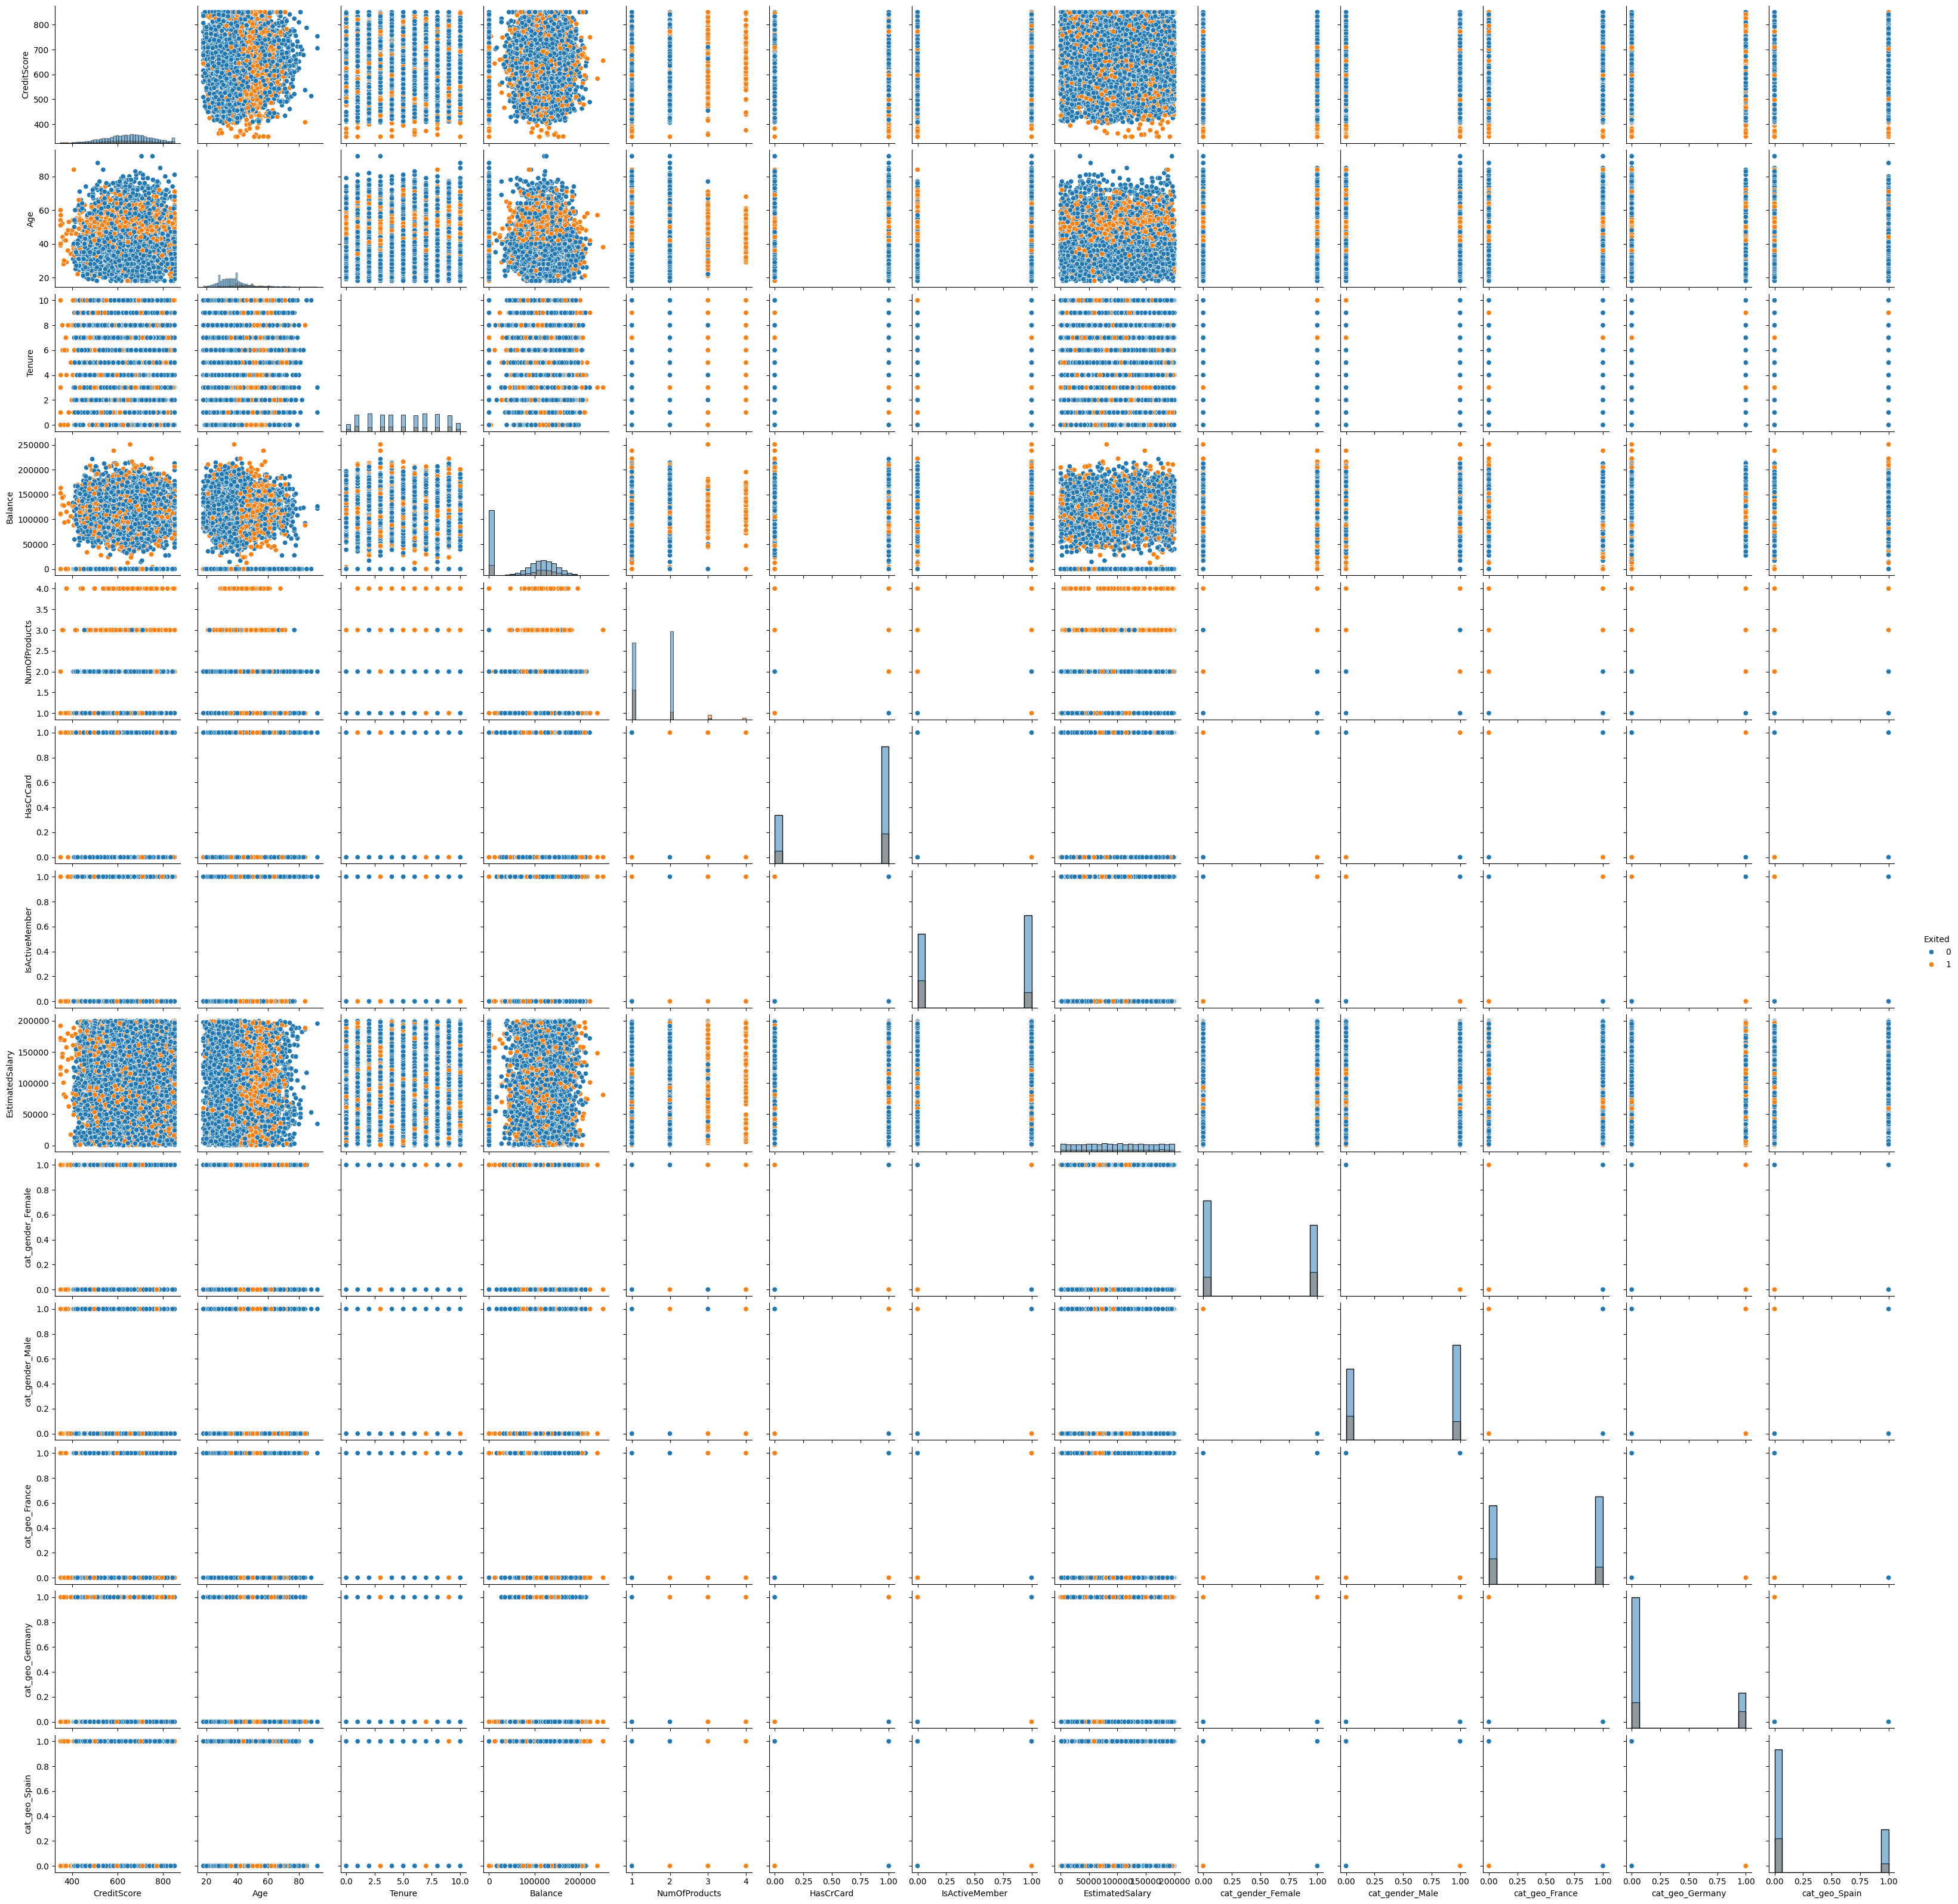

In [28]:
# Investigate colinearity
plt.figure(figsize=(10,10))
sns.pairplot(dataset.drop(columns=['CustomerId','Surname']),
             hue="Exited",
             diag_kind="hist")
plt.show()

In [29]:
# Transform data
sc = StandardScaler()
X = sc.fit_transform(dataset_train.drop(columns=['Exited',
                                                 'CustomerId',
                                                 'Surname']))
y = dataset_train['Exited']

# Split data to train and test
x_train, x_test, y_train, y_test = train_test_split(X,
                                y,
                                shuffle=True,
                                test_size=0.3,
                                random_state=42)

In [32]:
X.shape

(10000, 13)

## **4: NN Development**

In [33]:
# Intiate Sequential model
exited_dl_classifier = tf.keras.models.Sequential([
    tf.keras.layers.Dense(6,
                          activation='relu',
                          input_shape = (X.shape[1],)),
    tf.keras.layers.Dense(12,
                          activation='relu'),
    tf.keras.layers.Dense(36,
                          activation='relu'),
    tf.keras.layers.Dense(64,
                          activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1,
                          activation='sigmoid')])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### **4.1: Model Compliation**

In [38]:
# Compile Model
exited_dl_classifier.compile(optimizer = 'adam',
                             loss = 'binary_crossentropy',
                             metrics = ['accuracy', 'mse','f1_score'])

## **5: Training Phase**

In [51]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=15,
                                     restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(patience=3),
    tf.keras.callbacks.ModelCheckpoint('best_model.keras',
                                       monitor='mse',
                                       mode='min',
                                       save_best_only = True)
]

In [52]:
exited_dl_classifier.fit(x_train,
                         y_train,
                         epochs = 100,
                         callbacks = callbacks)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8720 - f1_score: 0.3421 - loss: 0.3150 - mse: 0.0949 - learning_rate: 0.0010
Epoch 2/100
 41/219 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8821 - f1_score: 0.3132 - loss: 0.2904 - mse: 0.0880

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,f1_score,loss,mse
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,f1_score,loss,mse,learning_rate.
  callback.on_epoch_end(epoch, logs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8753 - f1_score: 0.3336 - loss: 0.3075 - mse: 0.0932 - learning_rate: 0.0010
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8699 - f1_score: 0.3465 - loss: 0.3127 - mse: 0.0953 - learning_rate: 0.0010
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8806 - f1_score: 0.3354 - loss: 0.2998 - mse: 0.0898 - learning_rate: 0.0010
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8736 - f1_score: 0.3372 - loss: 0.3079 - mse: 0.0931 - learning_rate: 0.0010
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8666 - f1_score: 0.3514 - loss: 0.3141 - mse: 0.0965 - learning_rate: 0.0010
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8708 - f1_score: 0.3559 - loss: 0.3198 - mse: 0.0980 - learning_rate: 0.0010
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8668 - f1_score: 0.3460 - loss: 0.3085 - mse: 0.0947 - learning_rate: 0.0010
Epoc

## **6: Evaluation**

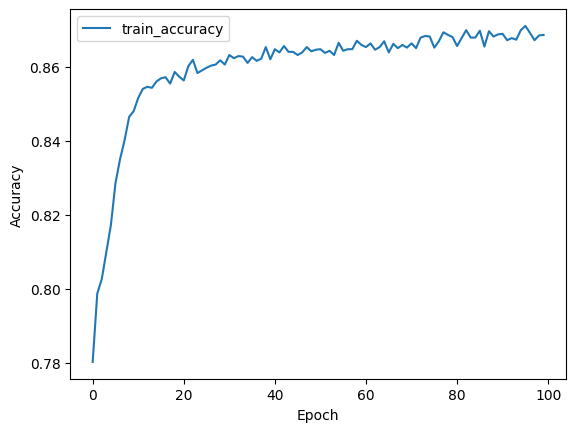

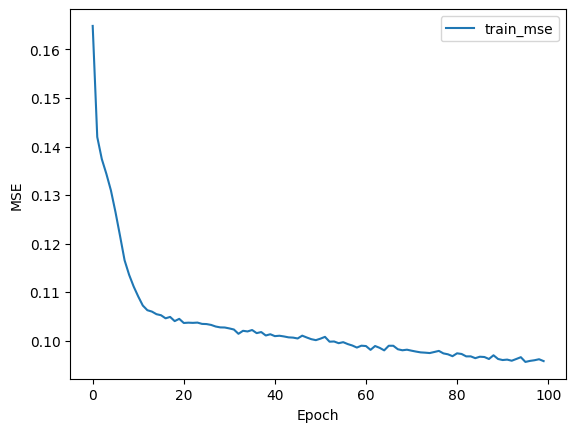

In [40]:
# Plot accuracy
plt.plot(exited_dl_classifier.history.history['accuracy'],
         label='train_accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
# Plot MSE
plt.plot(exited_dl_classifier.history.history['mse'],
         label='train_mse')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

In [41]:
# Test model preformance
model_results = exited_dl_classifier.evaluate(x_test,y_test, return_dict=True)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8577 - f1_score: 0.3297 - loss: 0.3525 - mse: 0.1059


In [48]:
model_results

{'accuracy': 0.8659999966621399,
 'f1_score': 0.325892835855484,
 'loss': 0.34044352173805237,
 'mse': 0.10174761712551117}